# Salary predictions Based on Job Descriptions

Goal is to perform Exploratory Data Analysis on the given data set and to idetify what features affect mostly on the salary and then to predict salary for different job postings.

In [7]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#my info here
__author__ = "Waruni Wijayasinghe"
__email__ = "waruni1017@gmail.com"
#import os
#print(os.getcwd())

### Data Acqusition

In [8]:
#load the data into a Pandas dataframe
df_train_features=pd.read_csv('train_features.csv')
df_train_salaries=pd.read_csv('train_salaries.csv')
df_test_features=pd.read_csv('test_features.csv')
#display the first 3 rows on train_features
df_train_features.head(3)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38


In [9]:
#display the first 3 rows on train_salaries
df_train_salaries.head(3)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137


In [10]:
#display the first 3 rows on test_features
df_test_features.head(3)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9


In [19]:
#merge data
df=df_train_features.merge(df_train_salaries, on="jobId") 
print('The shape of the data set is:', df.shape)
df.head(3)

The shape of the data set is: (1000000, 9)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137



### Data Preparation

In [14]:
#look for duplicate data  or corrupt data and remove it
df.duplicated().sum()

0

No duplicate data found on the dataset.

In [15]:
#look for invalid data (e.g. salaries <=0)
df[df.salary<=0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Looks like there are 5 data entries with 0 salaries, and it doesn't make sense. So it is better to remove them.

In [36]:
#remove data entries with salary 0
df.drop(df[ (df['salary'] == 0) ].index, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


There are 6 object features and 2 integer features and the target variable salary is also integer. The features jobId, companyId will not be further explored, as they won't have an impact on the salary.

### Exploratory Data Analysis

In [38]:
#summarize each feature variable
def plot_feat(df, col):
    
    plt.figure(figsize=(10,5))
    plt.subplot(3,1,1)
    my_order = df.groupby(by=[col])['salary'].median().sort_values(ascending=True).index
    sns.boxplot(x=col, y="salary", data=df, order=my_order)
    
    plt.subplot(3,1,2)
    mean=df.groupby(by=[col])['salary'].mean().sort_values().plot()
    plt.xlabel(col)
    plt.ylabel('mean salary')
    
    plt.subplot(3,1,3)
    df[col].value_counts().sort_values().plot() 
    plt.xlabel(col)
    plt.ylabel('count')
    
    plt.show()   

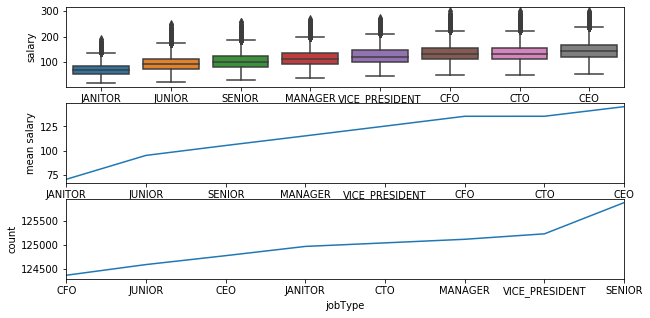

In [39]:
plot_feat(df, 'jobType')

The sample have more senior positions and less CFO positions. However, when observing mean salaries for each position, it can be noticed that higher the position (rank), higher the salary.

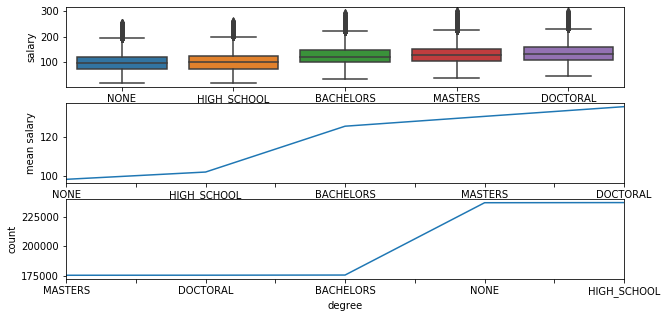

In [40]:
plot_feat(df, 'degree')

Most of the sample have high scoolers and people having none of the mentioned educational quaalifications. Number of people having masters, doctorals and Bachelors are less than that. However, higher the educational qualification higher the salary.

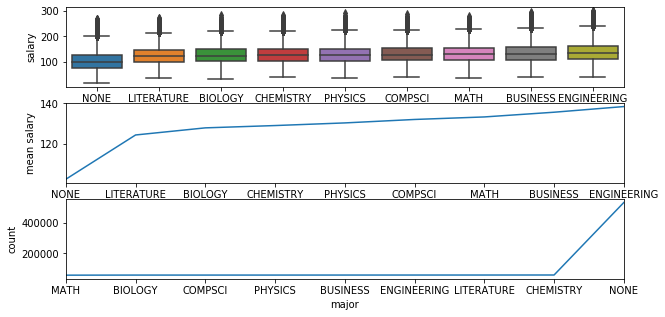

In [41]:
plot_feat(df, 'major')

People majored in Engineering have the highest mean salary and people with no major have the least mean salary. 

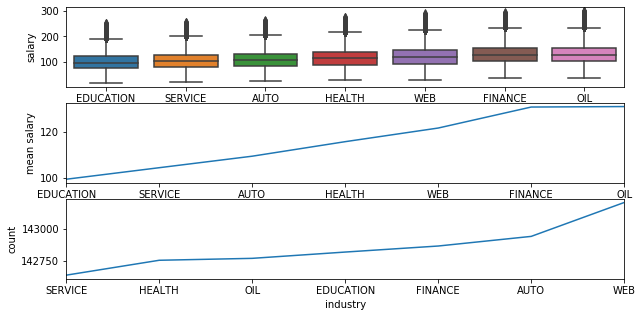

In [42]:
plot_feat(df, 'industry')

People in oil, finance industries seem to have the highest mean salary according to our data set. However, most people in the data set is in web industry.

In [43]:
def plot_feat_num(df, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    mean=df.groupby(by=[col])['salary'].mean().sort_values().plot()
    plt.xlabel(col)
    plt.ylabel('mean salary')
    
    plt.subplot(1,2,2)
    df[col].value_counts().sort_index().plot() 
    plt.xlabel(col)
    plt.ylabel('count')
    
    plt.show()

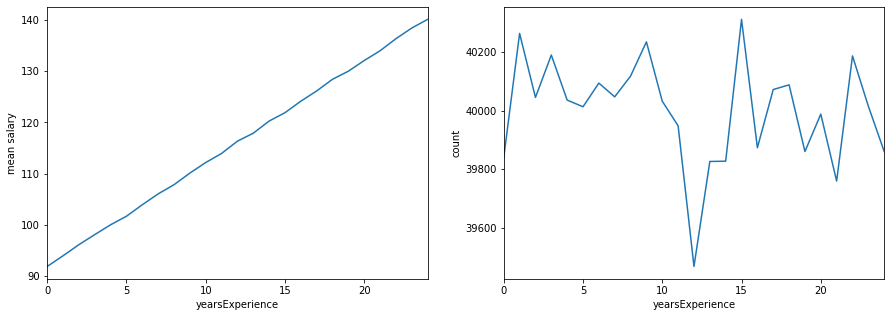

In [44]:
plot_feat_num(df, 'yearsExperience')

As the years of experience increases, mean salary also increases.

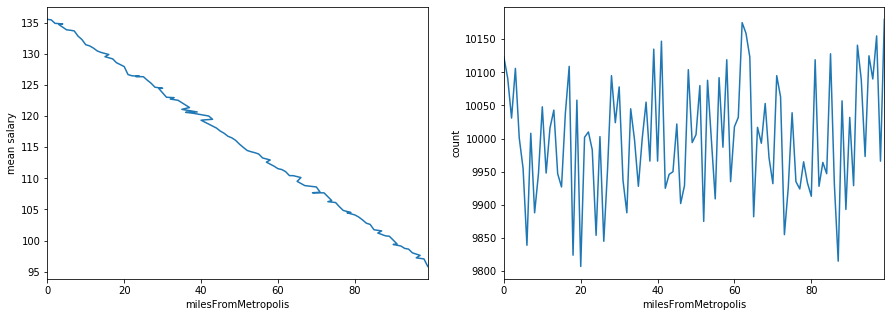

In [45]:
plot_feat_num(df, 'milesFromMetropolis')

Higher the distance from metropolis, lower the mean salary becomes.

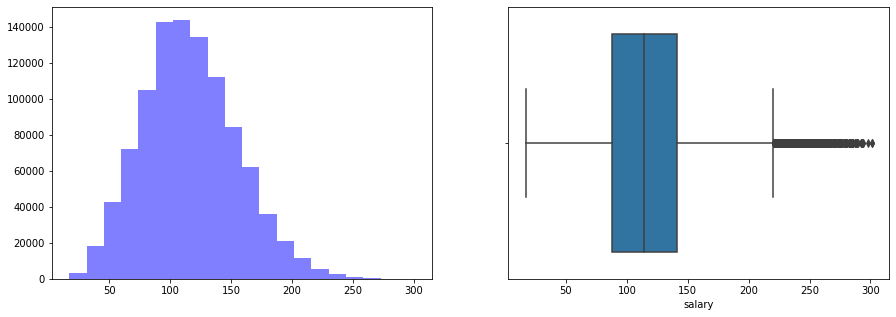

In [46]:
#summarize the target variable
plt.figure(figsize=(15,5))
salary=df['salary']
plt.subplot(1,2,1)
num_bins=20
n, bins, patches=plt.hist(salary, num_bins, facecolor='blue', alpha=0.5)
plt.subplot(1,2,2)
sns.boxplot('salary', data=df)
plt.show()

Salary distribution seem to have a distribution close to normal distribution.

In [47]:
df.groupby(['degree'])['salary'].mean().sort_values()

degree
NONE            98.176882
HIGH_SCHOOL    101.921085
BACHELORS      125.454663
MASTERS        130.505647
DOCTORAL       135.490979
Name: salary, dtype: float64

In [48]:
df.groupby(['jobType'])['salary'].mean().sort_values()

jobType
JANITOR            70.813045
JUNIOR             95.333087
SENIOR            105.487775
MANAGER           115.368518
VICE_PRESIDENT    125.368630
CFO               135.458547
CTO               135.481067
CEO               145.311425
Name: salary, dtype: float64

In [49]:
df.groupby(['industry'])['salary'].mean().sort_values()

industry
EDUCATION     99.448386
SERVICE      104.446820
AUTO         109.435222
HEALTH       115.735540
WEB          121.645362
FINANCE      130.747659
OIL          130.953863
Name: salary, dtype: float64

In [50]:
#look for correlation between each feature and the target
df.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


Eventhough there doesn't seem to be strong correlations between salary and 2 numerical features, it seems reasonable to try multiple linear regression considering how the mean salary increases with years of experinces and how it decreases with the distance from metropolis. 

### Multiple Linear Regression

### Features and Labels

In [53]:
#gathering features
features=df[['jobType', 'degree', 'major', 'industry','yearsExperience', 'milesFromMetropolis']]
#one-hot encode categorical features
features=pd.get_dummies(features)
#saving feature names for later use
feature_list=list(features.columns)
#identifying labels
labels=df['salary']
print('shape of features after one-hot encoding:', features.shape)

shape of features after one-hot encoding: (999995, 31)


### Training and Testing Sets 

In [52]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels=train_test_split(features, labels, test_size=0.3, random_state=42)
print('Training features shape:',train_features.shape)
print('Test features shape:',test_features.shape)
print('Training labels shape:',train_labels.shape)
print('Test labels shape:',test_labels.shape)

Training features shape: (699996, 31)
Test features shape: (299999, 31)
Training labels shape: (699996,)
Test labels shape: (299999,)


The R-squared value is: 0.7436935448750146
The mean square error of salary and predicted value is:  384.2013286553877


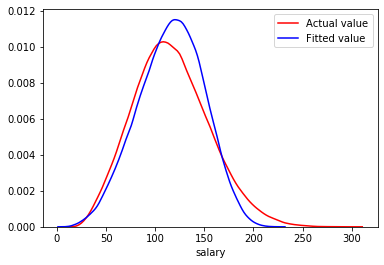

In [55]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#create a linear regression object
lm=LinearRegression()
#fit the model
lm.fit(train_features,train_labels)
#obtain a prediction
Y_hat_MLR = lm.predict(test_features)
print('The R-squared value is:', lm.score(train_features,train_labels))
print('The mean square error of salary and predicted value is: ',mean_squared_error(test_labels, Y_hat_MLR))
#distribution plot
ax1=sns.distplot(test_labels, hist=False, color="r", label="Actual value")
sns.distplot(Y_hat_MLR, hist=False, color="b", label="Fitted value", ax=ax1)

Approximately 74.369% of the variation of salary is explained by this multiple linear regression model. And the mean square error is 384.2. In hope of decreasing mean square error, next will use random forest regressor model to fit data. 

In [58]:
from sklearn.ensemble import RandomForestRegressor
#Instantiate model with 60 decision trees
rf=RandomForestRegressor(n_estimators=60, max_depth=25, min_samples_split=60, max_features='auto',n_jobs=-1)
#Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [59]:
#obatain a prediction
predictions=rf.predict(test_features)
print('The mean square error of salary and predicted value is: ',mean_squared_error(test_labels, predictions))

The mean square error of salary and predicted value is:  366.7268765702939


In [77]:
from sklearn.ensemble import GradientBoostingRegressor 
gb=GradientBoostingRegressor(n_estimators=200, max_depth=3, learning_rate=0.1, min_samples_split=2, )
gb.fit(train_features, train_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
y_hat_gb=gb.predict(test_features) 
print('The mean square error of salary and predicted value is: ',mean_squared_error(test_labels, y_hat_gb))

The mean square error of salary and predicted value is:  359.41755563886016


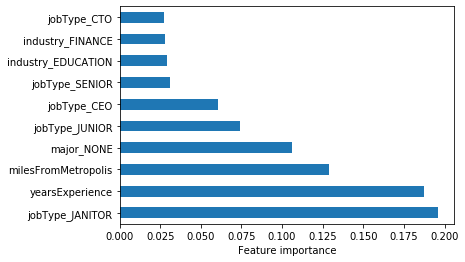

In [78]:
feat_importances = pd.Series(gb.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature importance')
plt.show()

Out of the 3 models (Multiple Linear Regression, Random Forest, Gradient Boosting) used, gradient boosting seem to be a better fit for data with mean square value of 359.4. When checking the feature importance, it can be observed that most 3 important features are jobtype_janitor, yearsExperience, milesFromMetropolis.